##Overview

This chapter will introduce to model evaluation, where evaluate or assess the performace of each model that decide to put into production.

## Introduction

When you assess to the performace of a model, you look at certain measurements or values that tell you how well the model is performing under certain conditions, and helps make an informed decision about wheter or not to make use of the model to the real world. 

Some of the measurements you will encounter in this chapter are **MAE**, **precision**, **recall** and **R2 score**.

### Exercise 6.01: Importing  and Splitting Data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
_headers = ['buying', 'maint','doors','persons','lug_boot','safety','car']

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter06/Dataset/car.data', names=_headers, index_col=None)

In [4]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,car
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
training, evaluation = train_test_split(df, test_size = 0.3, random_state = 0)

In [6]:
validation, test = train_test_split(evaluation, test_size = 0.5, random_state = 0)

## Assessing Model Performace for Regression Models
When you create a regression model, you create a model that predicts a continuous numerical variable, as you learned in Chapter 2, Regression. When you set aside your evaluation dataset, you have something that you can use to compare the quality of your model.

What you need to do to assess your model quality is compare the quality of your prediction to what is called the ground truth, which is the actual observed value that you are trying to predict. Take a look at Figure 6.4, in which the first column contains the ground truth (called actuals) and the second column contains the predicted values:

![texto alternativo](https://s3.amazonaws.com/thinkific/file_uploads/59347/images/2a8/f0e/bee/B15019_06_04.png)

Line **0** in the output compares the actual value in our evaluation dataset to what our model predicted. The actual value from our evaluation dataset is 4.891. The value that the model predicted is 4.132270.


In practice, the evaluation dataset will contain a lot of records, so you will not be making comparions visually. Instead, you will make use of some equations.

Carry out this comparion by computing te loss. The loss is the difference between the actuals and the predicted values, in data mining, it is called a distance measure. There are various approaches to compute this distance measures that give rise to different loss functions. Two of these are:

* Manhattan Distance

* Euclidean Distance

There are various loss functions for regression, but will conver the most commonly used loss functions for regression, which are:

* **Mean Absolute Error (MAE)** - This is based on Manhattan distance

* **Mean Squared Error (MSE)** - This is based on Euclidean distance

The goal of these functions is to measure the usefulness of the model by giving you a numerical value that shows how much deviation there is between the ground truth and the predicted values from your model.



## R2 Score
The R² score(pronounced "r squared") is sometimes called the "score" and measures the coefficient of determination of the model. Think of its as the model's ability to make good and reliable predictions. This measure is acessed using the **score()** method of the model and is available for all models.

The goal is to train successive models with a higher R2 score. The R2 score has a range between 0 and 1. Your goal is to try to get the model to have the score that is close to 1.


###Computing the R² Score of a Linear Regression Model


In [7]:
#importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression


In [8]:
# column headers
_headers = ['CIC0', 'SM1', 'GATS1i', 'NdsCH', 'Ndssc', 'MLOGP', 'response']
# read in data
df = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter06/Dataset/qsar_fish_toxicity.csv', names=_headers, sep=';')

In [9]:
features = df.drop('response', axis = 1).values
labels = df[['response']].values

X_train, X_eval, y_train, y_eval = train_test_split(features, labels, test_size = 0.20,
                                                    random_state = 0)

X_val, X_test, y_val, y_test = train_test_split(X_eval, y_eval, random_state = 0)

In [10]:
model = LinearRegression()

In [11]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
y_pred = model.predict(X_val)

In [13]:
r2 = model.score(X_val, y_val)
print('R² score: {}'.format(r2))

R² score: 0.5623861754188693


In [14]:
_ys = pd.DataFrame(dict(actuals = y_val.reshape(-1), predicted = y_pred.reshape(-1)))
_ys.head()

,actuals,predicted
0,3.742,4.155885
1,6.143,6.398238
2,4.674,5.183181
3,4.865,3.771333
4,4.732,4.593059


## Mean Absolute Error (MAE)

The **Mean Absolute Error (MAE)** is an evaluation for regression models that measures the absolute distance between your predictions and the ground truth.
The absolute distance is the distance regardless of the sign, whether positive or negative.

For example, if the ground truth is 6 and you predicted it is 5, the distane is 1. However, if you predicted 7, the distance it is **-1**. The absolute, without taking the signs into consideration, it's called **magnitude**. The MAE is computed by summing all of the magneitudes and dividing by the number of observations.

In [15]:
#Load libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [16]:
# column headers
_headers = ['CIC0', 'SM1', 'GATS1i', 'NdsCH', 'Ndssc', 'MLOGP', 'response']
# read in data
df = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter06/Dataset/qsar_fish_toxicity.csv', names=_headers, sep=';')

In [17]:
#Let's split data
features = df.drop('response', axis = 1).values
labels = df[['response']].values
X_train, X_eval, y_train, y_eval = train_test_split(features, labels, test_size = 0.20,
                                                    random_state = 0)
X_val, X_test, y_val, y_test = train_test_split(X_eval, y_eval, random_state = 0)

In [18]:
#Create a simple linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
y_pred = model.predict(X_val)

In [20]:
#Compute our Mean Absolute Error
mae = mean_absolute_error(y_val, y_pred)
print('MAE: {}'.format(mae))

MAE: 0.7243440846447939


In [21]:
#Let's get the R2 score
r2 = model.score(X_val, y_val)
print('R² score: {}'.format(r2))

R² score: 0.5623861754188693


### Exercise 6.03: Computing the Mean Absolute Error of a Second Model

In [22]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
# pipeline
from sklearn.pipeline import Pipeline
# preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In the first step, you will import libraries such as **train_test_split**, **LinearRegression**, and **mean_absolute_error**. We make use of a pipeline to quickly transform our features and engineer new features using **MinMaxScaler** and **PolynomialFeatures**. **MinMaxScaler** reduces the variance in your data by adjusting all values to a range between 0 and 1. It does this by subtracting the mean of the data and dividing by the range, which is the minimum value subtracted from the maximum value. **PolynomialFeatures** will engineer new features by raising the values in a column up to a certain power and creating new columns in your DataFrame to accommodate them.

In [23]:
# column headers
_headers = ['CIC0', 'SM1', 'GATS1i', 'NdsCH', 'Ndssc', 'MLOGP', 'response']
# read in data
df = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter06/Dataset/qsar_fish_toxicity.csv', names=_headers, sep=';')

In [24]:
#Lets split our data
features = df.drop('response', axis =1).values
labels = df[['response']].values
X_train, X_eval, y_train, y_eval = train_test_split(features, labels, test_size=0.2, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_eval, y_eval, random_state=0)

In [25]:
#Create a pipeline and engineer quadratic features
steps = [
         ('scaler', MinMaxScaler()),
         ('poly',PolynomialFeatures(2)),
         ('model',LinearRegression())
]


In [26]:
model = Pipeline(steps)

In [27]:
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [28]:
y_pred = model.predict(X_val)

In [29]:
mae = mean_absolute_error(y_val, y_pred)
print('MAE: {}'.format(mae))

MAE: 0.6605526100836078


In [30]:
r2 = model.score(X_val, y_val)
print('R² score: {}'.format(r2))

R² score: 0.6284921344153389


## Other Evaluation Metrics
There are other model evaluations functions for regression. Recall that these are all cost (or loss) functions. These include **max_error**, **mean_squared_error**,**mean_squared_log_error**,
**median_absolute_error**.

The **mean_squared_error (MSE)** is computed by taking the squareds of the differences between the ground truths and the predictions,
summing them, and dividing by the number of observations. The MSE  is large, and sometimes the square root of this is used, which is the **Root Mean Squared Error (RMSE)**.

The **mean squared logarithmic error (MSLE)**  introduces logarithms into the equation by adding one to both the ground truth and the prediction before taking the logarithms, then squaring the differences, then summing them, and dividing by then number of observations. MSLE Has the property of having a lower cost for predictions that are above the ground truth than for those that are below it.

Finally, **median_absolute_error** finds the median value of the absolute errors, which are the difference between the ground truth and the predictions.

###Exercise 6.05: Creating a Classification Model for Computing Evaluation Metrics

In [31]:
# import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [55]:
# data doesn't have headers, so let's create headers
_headers = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'car']
# read in cars dataset
df = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter06/Dataset/car.data', names=_headers, index_col=None)
df.head()

,buying,maint,doors,persons,lug_boot,safety,car
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [56]:
# encode categorical variables
_df = pd.get_dummies(df, columns=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
_df.head()

,car,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,doors_4,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,unacc,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0
1,unacc,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1
2,unacc,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0
3,unacc,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0
4,unacc,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1


In [57]:
# split data into training and evaluation datasets
features = _df.drop('car', axis=1).values
labels = _df['car'].values
X_train, X_eval, y_train, y_eval = train_test_split(features, labels, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_eval, y_eval, test_size=0.5, random_state=0)

In [58]:
# train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
# make predictions for the validation set
y_pred = model.predict(X_val)

In [37]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_val, y_pred)

array([[ 41,   1,   9,   0],
       [  7,   2,   0,   1],
       [  7,   0, 178,   0],
       [  1,   0,   0,  12]])

## More on the Confusion Matrix

The confusion matrix helps analyze the impact of the choices you would have to make if you put the model into production.
Let's consider the example of predicting the presence of a disease based on the inputs to the model. This is a binary classification problem, where 1 implies that the disease is present and 0 implies the disease is absent. The confusion matrix for this model would have two columns and two rows.

The first column would show the item that fall into class **0**. The first row would show the items that were correctly classified into **0** and are called **true negatives**.
The second row would show the items that were wrongly classified as 1 but should have been 0. These are false positives.

False Positives are the case in which the samples were wrongly predicted to be infected when they are actually healthy. That these cases would be treated for a disease that they do not have.

False negatives are the cases that were wrognly predicted to be healthy when they actually have the disease. THese cases would no be treated for a disease that hey actually have.

## Precision
The precision is the total number of cases that were correctly classified as positves (called True Positives) divided by the total number of cases in that prediction (total number of entries in the row, both correctly classified (TP) and wrongly classified (FP) from the confusion matrix.

![texto alternativo](https://s3.amazonaws.com/thinkific/file_uploads/59347/images/1f1/415/6db/B15019_06_26.PNG)

* **tp** is true positive
* **fp** is false positives

In [38]:
from sklearn.metrics import precision_score

In [39]:
precision_score(y_val, y_pred, average = 'macro')

0.8184395261601145

## Recall
Recall is the total number of predictions that were true divided by the number of predictions for the class, both true and false. Think of it as the true positive divided by the total sum of entries in the column

![texto alternativo](https://s3.amazonaws.com/thinkific/file_uploads/59347/images/959/b40/584/B15019_06_28.PNG)

The function for this is recall_score, which is available at sklearn.metrics.

In [40]:
from sklearn.metrics import recall_score 
recall_score(y_val, y_pred, average = 'micro')

0.8996138996138996

## F1 Score

The F1 Score is another important parameter that helps us to evalaute the model performace. It considers the contribution of both precision and recall using the following equation:

![texto alternativo](https://s3.amazonaws.com/thinkific/file_uploads/59347/images/0ae/5f9/6cc/B15019_06_30.PNG)

The F1 score ranges from 0 to 1, with 1 being the best possible score. You compute the F1 score using f1_score from sklearn.metrics.



In [41]:

from sklearn.metrics import f1_score

In [42]:
f1_score(y_val, y_pred, average = 'macro')

0.7385284045669938

## Accuracy

Accuracy is an evaluation metric that is applied to classification models. It is computed by counting the number of labels that were correctly predicted, meaning that the predicted label is sane as the ground truth.

In [43]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_val, y_pred)

0.8996138996138996

## Logarithmic Loss

The logarithmic loss (or log loss) is the loss function for categorical models. It is also called categorical cross-entropy. It seeks to penalize incorrect predictions. The sklearn documentation defines it as "the negative log-likelihood of the true values given your model predictions."

In [44]:
from sklearn.metrics import log_loss

In [45]:
log_loss(y_val, model.predict_proba(X_val))

0.22578836752298448

## Receiver Operation Characteristic Curve
Recall the True Positive Rate, which we discussed earlier. It also called **sensitivy**. Also recall that hat we try to do with a logistic regression model is find a threshold value such that above that threshold value, we predicted that our input falls into a certain class, and below that threshold, we predict that our input falls into a certain class, and below that threshold, we predict that it doesn't.

The **Receiver Operating Characteristic (ROC)** curve is a plot that shows how the true positive and false positive rates vary for a model as the threshold is change.

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# data doesn't have headers, so let's create headers
_headers = ['Age', 'Delivery_Nbr', 'Delivery_Time', 'Blood_Pressure', 'Heart_Problem', 'Caesarian']
# read in cars dataset
df = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter06/Dataset/caesarian.csv.arff', names=_headers, index_col=None, skiprows=15)
df.head()
# target column is 'Caesarian'

,Age,Delivery_Nbr,Delivery_Time,Blood_Pressure,Heart_Problem,Caesarian
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1


In [48]:
# target column is 'Caesarian'
features = df.drop(['Caesarian'], axis=1).values
labels = df[['Caesarian']].values
# split 80% for training and 20% into an evaluation set
X_train, X_eval, y_train, y_eval = train_test_split(features, labels, test_size=0.2, random_state=0)
# further split the evaluation set into validation and test sets of 10% each
X_val, X_test, y_val, y_test = train_test_split(X_eval, y_eval, test_size=0.5, random_state=0)

In [49]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
#Predict the probabilities
from sklearn.metrics import roc_curve
y_prob = model.predict_proba(X_val)
_false_positive, _true_positive, _thresholds = roc_curve(y_val, y_prob[:,0])

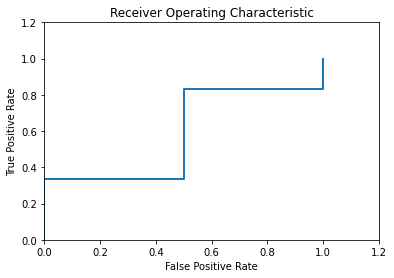

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(_false_positive, _true_positive, lw=2, label='Receiver Operating Characteristic')
plt.xlim(0.0, 1.2)
plt.ylim(0.0, 1.2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()

In this exercise, you learned to plot how the true positive rate and false positive rate of the model vary as you change the prediction threshold. Recall that what the model does is output a value between 0 and 1. This value is called a logit. Your job as a data scientist is to decide on a threshold value, for example, 0.5. If the logit is above that threshold, you predict that the input falls into one class (positive, if it is a positive-or-negative prediction). If the logit is below the threshold, you will predict that the input belongs to the negative class.

For example, if your threshold is 0.5, then a logit of 0.33 is predicted as negative, while a logit of 0.80 is predicted as positive.

However, if your threshold is 0.95, then a logit of 0.33 is predicted as negative, and a logit of 0.80 is still predicted as negative.

Now, recall that what you want your model to do is correctly classify as many data points as possible. Classification is controlled by your chosen threshold value. The logit (predicted probability) from the model will always be the same, but the class assigned to the prediction will depend on the threshold.

As you vary the threshold, the predictions change, and the number of true positives and true negatives changes.

The RoC shows you how the percentage of true positives and true negatives changes as the threshold varies from 0 to 1.

The higher the threshold, the more confident the model needs to be before you classify a prediction as positive. Recall that the logit is the probability that the input belongs to a class and is a confidence score from 0 to 1.

### Exercise 6.13: Computing the ROC AUC for the Caeserian Dataset

In [61]:
y_prob = model.predict_proba(X_val)
print(y_prob)

[[4.60776400e-06 7.70401054e-06 9.99986387e-01 1.30119227e-06]
 [7.54399972e-01 2.90802956e-02 1.78052434e-01 3.84672993e-02]
 [4.24969841e-01 1.56752321e-02 5.58600286e-01 7.54640517e-04]
 ...
 [6.80141099e-01 5.66671949e-03 3.13304664e-01 8.87517072e-04]
 [8.79988861e-01 3.97791106e-02 6.32544446e-02 1.69775834e-02]
 [7.98346710e-08 2.00342605e-09 9.99999918e-01 1.60394507e-11]]


In [65]:
from sklearn.metrics import roc_auc_score 
_auc = roc_auc_score(y_val, y_prob[:,0], multi_class = 'ovo')
print(_auc)

AxisError: ignored

## Saving a Model 

In [66]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [68]:
_headers = ['CIC0', 'SM1', 'GATS1i', 'NdsCH', 'Ndssc', 'MLOGP', 'response']

# read in data
df = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter06/Dataset/qsar_fish_toxicity.csv', names=_headers, sep=';')

In [69]:
df.head()

,CIC0,SM1,GATS1i,NdsCH,Ndssc,MLOGP,response
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390


In [73]:
features = df.drop('response', axis = 1).values
labels = df[['response']].values 

X_train, X_eval, y_train, y_eval = train_test_split(features, labels,test_size = 0.20, random_state = 0)
X_val, X_test, y_val, y_test = train_test_split(X_eval, y_eval, random_state= 0)

In [74]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

In [75]:
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [78]:
joblib.dump(model, './model.joblib')

['./model.joblib']

In [81]:
m2 = joblib.load('./model.joblib')
m2_preds = m2.predict(X_val)

In [84]:
ys  = pd.DataFrame(dict(predicted = (y_pred.reshape(-1)),
                        m2 = m2_preds.reshape(-1)))
ys.head()

,predicted,m2
0,4.155885,4.155885
1,6.398238,6.398238
2,5.183181,5.183181
3,3.771333,3.771333
4,4.593059,4.593059


## Activity 6.01: Train Three Different Models and use Evaluation to Pick the Best Performing models.

In [85]:
file_url = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter03/bank-full.csv'
bankData = pd.read_csv(file_url, sep = ';')
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [101]:
bankCat = pd.get_dummies(bankData[['job','marital','education','default','housing', 'loan','contact','month','poutcome']])
bankCat.shape

(45211, 44)

In [105]:
bankNum = bankData[['age','balance','day','duration','campaign','pdays','previous']]
X = pd.concat([bankCat, bankNum], axis = 1)
y = bankData['y']

In [121]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [122]:
y

array([0, 0, 0, ..., 1, 0, 0])

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 41)

In [124]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [125]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth = 6)
dt_model.fit(X_train,y_train)
dt_preds = dt_model.predict(X_test)

In [126]:
from sklearn.metrics import classification_report
dt_report = classification_report(y_test, dt_preds)
print(dt_report)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7927
           1       0.62      0.35      0.44      1116

    accuracy                           0.89      9043
   macro avg       0.77      0.66      0.69      9043
weighted avg       0.88      0.89      0.88      9043



In [127]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [128]:
rf_predictions = rf_model.predict(X_test)
rf_report = classification_report(y_test,rf_predictions)
print(rf_report)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7927
           1       0.64      0.38      0.48      1116

    accuracy                           0.90      9043
   macro avg       0.78      0.68      0.71      9043
weighted avg       0.88      0.90      0.89      9043



In [130]:
from sklearn.metrics import r2_score
linear_r2 = r2_score(y_test, lr_predictions)
dt_r2 = r2_score(y_test, dt_preds)
rf_r2 = r2_score(y_test, rf_predictions)
print('Logistic Regression R² Score: {}'.format(linear_r2))
print('Decision Tree R² Score: {}'.format(dt_r2))
print('Random Forest R² Score: {}'.format(rf_r2))

Logistic Regression R² Score: -0.09989632095379286
Decision Tree R² Score: 0.015613236915889894
Random Forest R² Score: 0.051390533601189836


## Summary
Some of the evaluation metrics for classification models require a binary classification model. If you are working with more than two classes, you will need to use one-versus-all. The one-versus-all approach builds one model for each class and tries to predict the probability that the input belongs to a specific class. You will then predict that the input belongs to the class where the model has the highest prediction probability.

ROC and ROC AUC only work with binary classification.

If you were wondering why we split our evaluation dataset into two, it's because X_test and y_test are used once for a final evaluation of the model's performance. You make use of them before putting your model into production to see how the model would perform in a production environment.

You have learned how to assess the quality of a regression model by observing how the loss changes. You saw examples using the MAE, and also learned of the existence of MSE.

You also learned about how to assess the quality of classification models in the activity.